---
---

# 1. Análise exploratória

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alrakomala/lighthouse/main/teste_indicium_precificacao.csv')

df.head(3)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

## Limpeza dos dados

Temos 16 colunas e 48894 linhas. O tipo de dado está correto para todas as variáveis, exceto para o campo 'ultima_review', que deveria ser transformado em Datetype, mas para esta análise não é relevante.

Outro campo que não parece relevante para a presente análise é 'host_name'. É importante descartar dados que não são relevantes para evitar o uso desnecessário de memória causado por sua manipulação. 


#### Exclusão das duas colunas não relevantes:

In [4]:
df.drop(columns=['ultima_review', 'host_name'], inplace=True)

#### Exclusão de linhas com pelo menos um NaN:

In [5]:
df.dropna(axis=0, how='any', inplace = True) 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38836 entries, 0 to 48851
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             38836 non-null  int64  
 1   nome                           38836 non-null  object 
 2   host_id                        38836 non-null  int64  
 3   bairro_group                   38836 non-null  object 
 4   bairro                         38836 non-null  object 
 5   latitude                       38836 non-null  float64
 6   longitude                      38836 non-null  float64
 7   room_type                      38836 non-null  object 
 8   price                          38836 non-null  int64  
 9   minimo_noites                  38836 non-null  int64  
 10  numero_de_reviews              38836 non-null  int64  
 11  reviews_por_mes                38836 non-null  float64
 12  calculado_host_listings_count  38836 non-null  int6

## Características: distribuição e faixas das variáveis

Utilizei um pairplot para ter uma ideia das possíveis correlações e das formas das distribuições de cada variável, mas neste caso o gráfico não é útil visualmente.

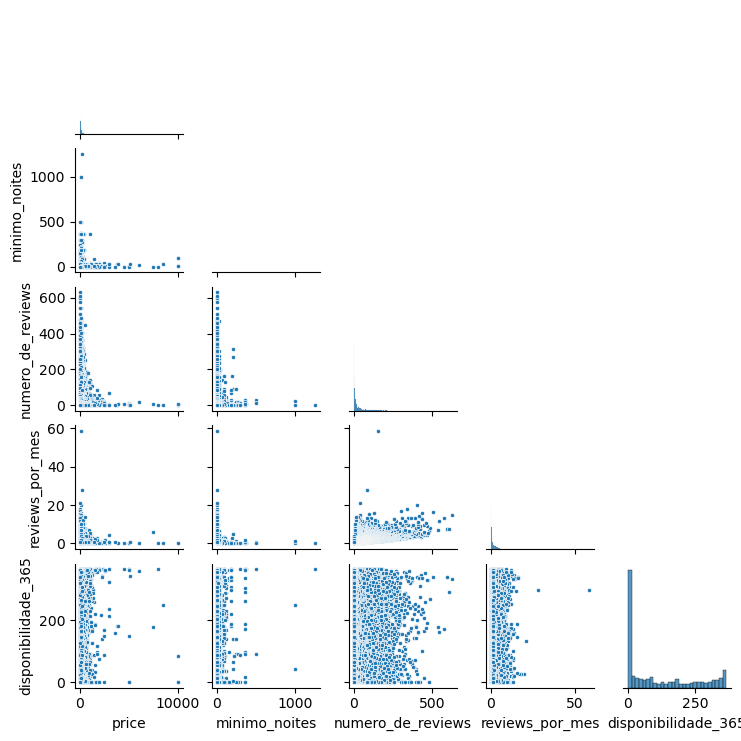

In [7]:
sns.pairplot(df[['price', 'bairro_group', 
                       'minimo_noites', 'numero_de_reviews', 
                       'reviews_por_mes', 'disponibilidade_365', 
                       'room_type']], height = 1.5, markers = '.',
                        diag_kind='hist', corner = True);


#### Exploração visual das variáveis numéricas relevantes.

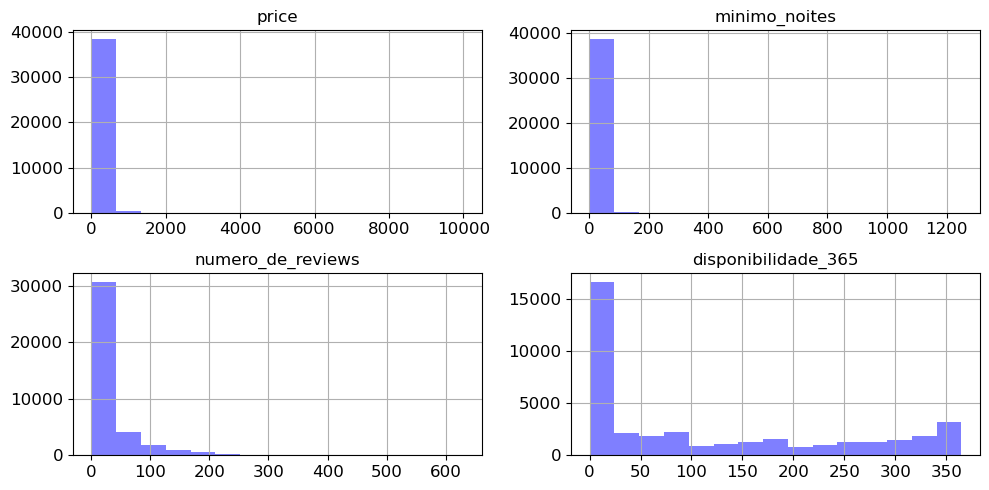

In [8]:
var_numerica = ['price', 'minimo_noites', 'numero_de_reviews', 'disponibilidade_365']

df[var_numerica].hist(bins=15, figsize=(10, 5), color='b', alpha = 0.5, xlabelsize=12, ylabelsize=12)
plt.tight_layout();

#### Exploração da variável de interesse: **price**

Apresenta uma distribuição assimétrica com valores extremos muito distantes da média.


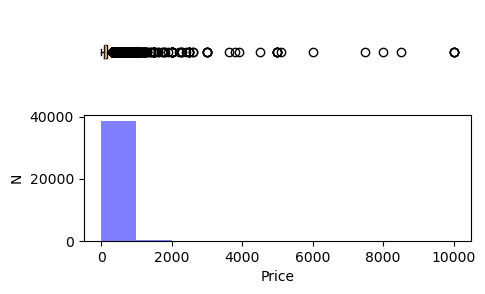

In [9]:

fig, ax = plt.subplots(2, figsize=(5, 3), sharex=True,
    gridspec_kw={"height_ratios": (.4, .6)} )

ax[0].boxplot(df['price'], vert=False)
ax[0].axis('off')

ax[1].hist(df['price'], color= 'b', alpha=0.5)
ax[1].set_xlabel('Price')
ax[1].set_ylabel('N');


#### Eliminação de valores atípicos

In [10]:

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

df_clean = df[((df['price'] > (Q1 - 1.5 * IQR)) & (df['price'] < (Q3 + 1.5 * IQR)))]

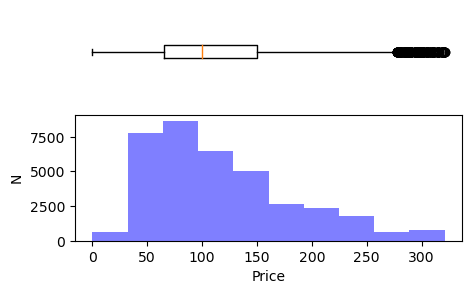

In [11]:
fig, ax = plt.subplots(2, figsize=(5, 3), sharex=True,
    gridspec_kw={"height_ratios": (.4, .6)} )

ax[0].boxplot(df_clean['price'], vert=False)
ax[0].axis('off')

ax[1].hist(df_clean['price'], color= 'b', alpha=0.5)
ax[1].set_xlabel('Price')
ax[1].set_ylabel('N');


#### Comportamento do preço em relação a outras variáveis

In [12]:
# Conhecer os diferentes bairros

df_clean['bairro_group'].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

#### Calcular o valor médio por bairro

In [13]:

df_clean.groupby(['bairro_group'])['price'].mean()

bairro_group
Bronx             74.664740
Brooklyn         105.812846
Manhattan        141.235670
Queens            87.641970
Staten Island     87.163462
Name: price, dtype: float64

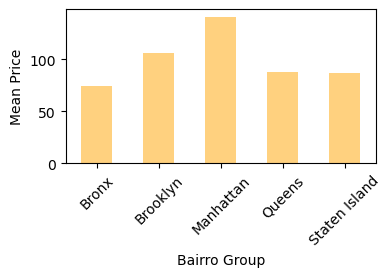

In [14]:
df_clean.groupby(['bairro_group'])['price'].mean().plot.bar(figsize=(4,2), 
                                                            xlabel='Bairro Group', 
                                                            ylabel='Mean Price', 
                                                            rot = 45, color='orange', 
                                                            alpha=0.5);



#### Distribuição do preço por bairro

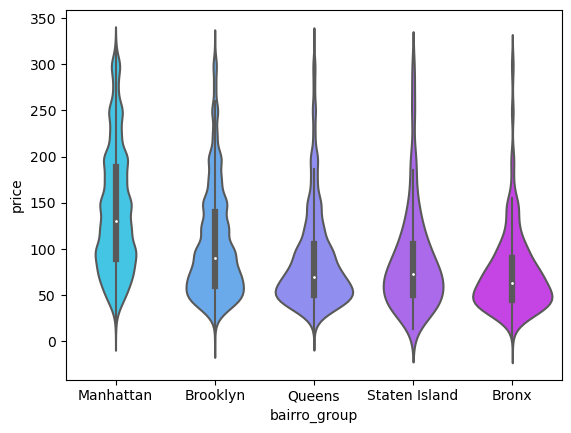

In [15]:

sns.violinplot(x="bairro_group", y="price", data=df_clean, palette="cool")
plt.show()

#### Média de valor por tipo de acomodação


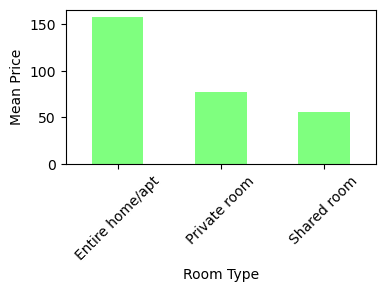

In [16]:
df_clean.groupby(['room_type'])['price'].mean().plot.bar(figsize=(4,2), 
                                                            xlabel='Room Type', 
                                                            ylabel='Mean Price', 
                                                            rot = 45, color='lime', 
                                                            alpha=0.5);


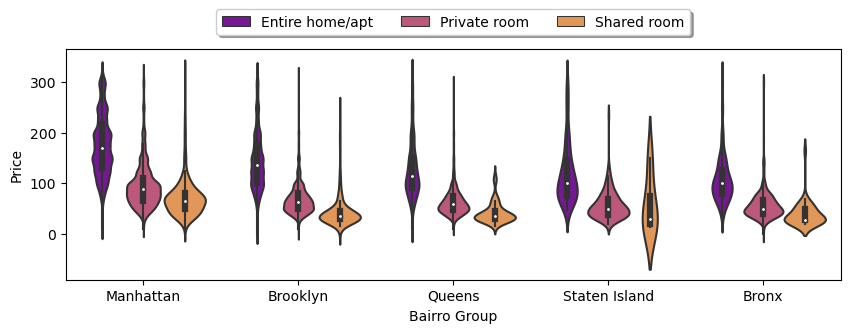

In [17]:
plt.figure(figsize=(10,3))
ax =  sns.violinplot(x="bairro_group", y="price", data=df_clean, hue = 'room_type', palette="plasma")
ax.set_xlabel('Bairro Group')
ax.set_ylabel('Price')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          fancybox=True, shadow=True, ncol=5);

Nesta figura, podemos observar a tendência de um preço maior quando se aluga um espaço inteiro, seguido pelo quarto privado e finalizando com o quarto compartilhado com um preço menor.

#### Distribuição do mínimo de noites

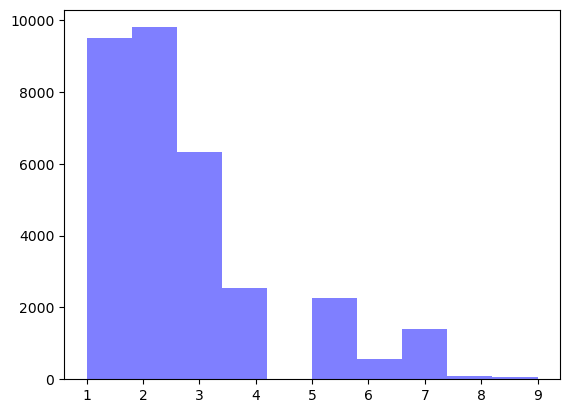

In [18]:

plt.hist(df_clean['minimo_noites'][df_clean['minimo_noites']<10], color= 'b', alpha=0.5, bins=10);

## Normalização/Escalação

Antes de prosseguir com a construção dos modelos, é necessário escalar ou transformar as variáveis de modo que as variáveis categóricas sejam convertidas em numéricas (cada classe correspondendo a um número), e que as variáveis numéricas tenham todas uma faixa similar para evitar um viés devido a diferentes valores absolutos.

In [19]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Definição do conjunto de dados com as variáveis relevantes para o modelo
data = df_clean[['latitude', 'longitude', 'price', 'minimo_noites',
       'numero_de_reviews', 'reviews_por_mes', 'calculado_host_listings_count',
       'disponibilidade_365', 'bairro_group', 'room_type']].copy()

# Variáveis independentes
X = data.drop(columns=['price'])

# Variável dependente (target)
y = data['price'].values.reshape(-1,1)


OHE = OneHotEncoder() # transformador de variáveis categóricas
scaler = StandardScaler() # escalador de faixa de variáveis numéricas

# Exclui "bairro" porque, ao treinar o modelo com uma fração do conjunto de dados, 
# há valores na previsão que não foram incluídos no treinamento

cat_cols = ['bairro_group', 'room_type'] 
num_cols = ['latitude', 'longitude', 'minimo_noites','numero_de_reviews', 'reviews_por_mes', 'calculado_host_listings_count',
       'disponibilidade_365']


transformer = ColumnTransformer([('cat_cols', OHE, cat_cols),
                                ('num_cols', scaler, num_cols)])


# Modelo de previsão de preços

## Justificação sobre o tipo de modelo (classificação ou regressão linear)

A variável que se pretende prever é o preço, que é uma variável numérica contínua, portanto, o tipo de modelo é de regressão linear.

## Linear regression

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

linear_reg = LinearRegression() 

pipeline_linear_reg = Pipeline([("preprocessing", transformer),
                ("regressor", linear_reg)])  

# Separação do conjunto de dados de treinamento e previsão
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Ajuste
pipeline_linear_reg.fit(X_train,y_train)



Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat_cols', OneHotEncoder(),
                                                  ['bairro_group',
                                                   'room_type']),
                                                 ('num_cols', StandardScaler(),
                                                  ['latitude', 'longitude',
                                                   'minimo_noites',
                                                   'numero_de_reviews',
                                                   'reviews_por_mes',
                                                   'calculado_host_listings_count',
                                                   'disponibilidade_365'])])),
                ('regressor', LinearRegression())])

### Avaliação de modelo regressão linear

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = pipeline_linear_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Erro quadrático médio (MSE): {:.2f}'.format(mse))
print('r2: {:.2f}'.format(r2))


Erro quadrático médio (MSE): 2176.71
r2: 0.50


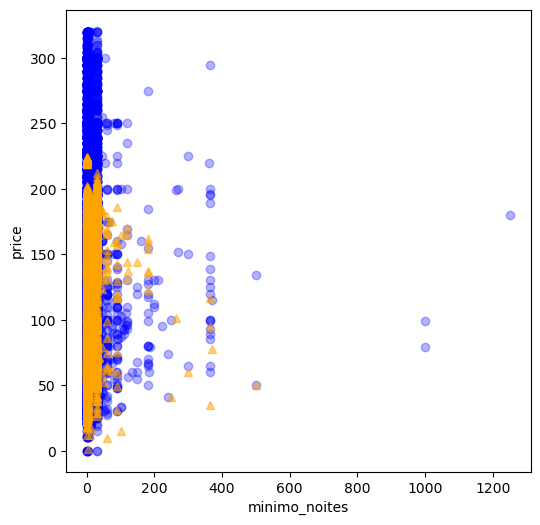

In [22]:
fig, ax = plt.subplots(figsize=(6,6))

ax.plot(X['minimo_noites'].values, y, 'ob', alpha=0.3)
plt.plot(X_test['minimo_noites'].values, y_pred, '^', color='orange', ms=6, alpha=0.5)
ax.set_xlabel('minimo_noites')
ax.set_ylabel('price');

In [23]:
with open('modelo_regresion_lineal_multiple.pkl', 'wb') as file:
    pickle.dump(pipeline_linear_reg, file)

## Random Forest Regressor

In [24]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor() 

pipeline_forest_reg = Pipeline([("preprocessing", transformer),
                ("regressor", forest_reg)])  

# A linha é comentada para comparar entre modelos treinados exatamente com os mesmos dados:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

pipeline_forest_reg.fit(X_train,y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat_cols', OneHotEncoder(),
                                                  ['bairro_group',
                                                   'room_type']),
                                                 ('num_cols', StandardScaler(),
                                                  ['latitude', 'longitude',
                                                   'minimo_noites',
                                                   'numero_de_reviews',
                                                   'reviews_por_mes',
                                                   'calculado_host_listings_count',
                                                   'disponibilidade_365'])])),
                ('regressor', RandomForestRegressor())])

### Avaliação de modelo regressor de floresta aleatória

In [25]:
y_pred = pipeline_forest_reg.predict(X_test)

mse_forest = mean_squared_error(y_test, y_pred)
r2_forest = r2_score(y_test, y_pred)

print('Erro quadrático médio (MSE): {:.2f}'.format(mse_forest))
print('r2: {:.2f}'.format(r2_forest))


Erro quadrático médio (MSE): 1808.93
r2: 0.58


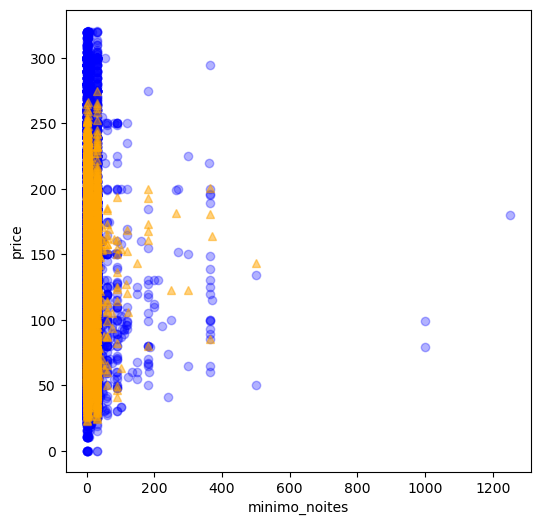

In [26]:
fig, ax = plt.subplots(figsize=(6,6))

ax.plot(X['minimo_noites'].values, y, 'ob', alpha=0.3)
plt.plot(X_test['minimo_noites'].values, y_pred, '^', color='orange', ms=6, alpha=0.5)
ax.set_xlabel('minimo_noites')
ax.set_ylabel('price');

In [27]:
with open('modelo_forest.pkl', 'wb') as file:
    pickle.dump(pipeline_forest_reg, file)

---
---

# Respostas a perguntas

A seguir, respondo às perguntas especificadas no desafio, as quais são baseadas na análise prévia.

#### Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra? 

Manhattan


#### O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço? 

Não, ao aplicar regressão linear simples com cada uma das variáveis

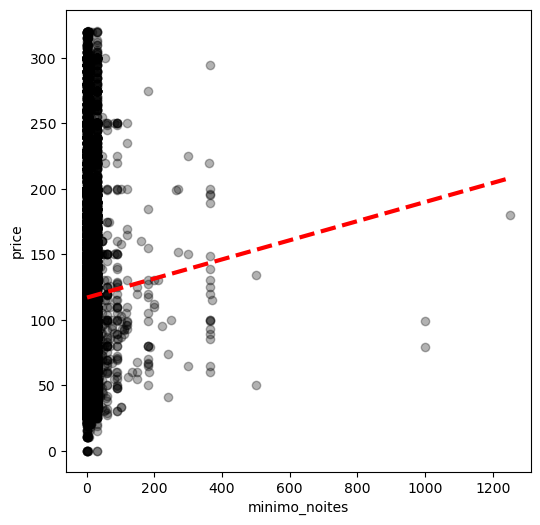

In [28]:
X1 = data['minimo_noites'].values.reshape(-1,1)

lr_1 = LinearRegression().fit(X1, y)

m = lr_1.coef_[0]
b = lr_1.intercept_[0]
z = np.linspace(X1.min(), X1.max(), 10)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(X1, y, 'ok', alpha=0.3)
ax.plot(z, m*z + b, ls='--', color='r', lw=3)
ax.set_xlabel('minimo_noites')
ax.set_ylabel('price')
plt.show()

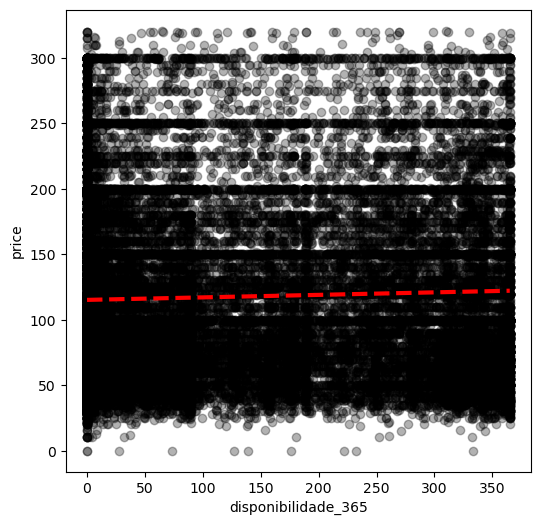

In [29]:
X2 = data['disponibilidade_365'].values.reshape(-1,1)

lr_2 = LinearRegression().fit(X2, y)

m = lr_2.coef_[0]
b = lr_2.intercept_[0]
z = np.linspace(X2.min(), X2.max(), 10)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(X2, y, 'ok', alpha=0.3)
ax.plot(z, m*z + b, ls='--', color='r', lw=3)
ax.set_xlabel('disponibilidade_365')
ax.set_ylabel('price')
plt.show()

#### Existe algum padrão no texto do nome do local para lugares de mais alto valor? 

Para responder a esta pergunta, pode-se fazer uma análise para palavras específicas como 'luxury', 'fancy', 'cozy', entre outras, e indicar com 1 se são mencionadas no nome e 0 se não são. Depois, verificar se existe alguma tendência.

In [30]:
# Apenas ordenando os dados, não parece haver tendência

df.sort_values(by=['price'], ascending=False)['nome'].head(20)

17691      Luxury 1 bedroom apt. -stunning Manhattan views
9150                   Furnished room in Astoria apartment
12341                  Quiet, Clean, Lit @ LES & Chinatown
6529                                    Spanish Harlem Apt
30267    Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho
4376                                         Film Location
45665                                 Gem of east Flatbush
3536                    UWS 1BR w/backyard + block from CP
43008      Midtown Manhattan great location (Gramacy park)
4344                      NearWilliamsburg bridge 11211 BK
25824                                             Fulton 2
2697                   Beautiful 1 Bedroom in Nolita/Soho 
26738                                           Broadway 1
37999        4-Floor Unique Event Space 50P Cap. - #10299B
4375                                  Photography Location
25900      Greenwich Village Townhome with Private Garden!
17664          VIP Duplex Townhouse with Private Garden!

#### Explique como você faria a previsão do preço a partir dos dados. 

Primeiro, realizar uma análise exploratória dos dados para compreender o tipo de variáveis, suas características (faixa e distribuição). Posteriormente, eliminar NaNs e dados irrelevantes. Transformar as variáveis categóricas em numéricas e escalar todas as variáveis para uma faixa similar. Por fim, separar o conjunto de dados em conjuntos de treinamento e teste, para treinar o modelo de regressão, uma vez que o preço é uma variável numérica contínua. 

#### Quais variáveis e/ou suas transformações você utilizou e por quê?

É mencionado acima

#### Qual tipo de problema estamos resolvendo (regressão, classificação)?

regressão

#### Qual modelo melhor se aproxima dos dados e quais seus prós e contras?

Modelo de regressão utilizando o algoritmo de Random Forest.

#### Qual medida de performance do modelo foi escolhida e por quê?

Erro quadrático médio (MSE) y Coeficiente de Determinação (r$^2$). 

MSE mede a média dos quadrados das diferenças entre os valores preditos pelo modelo e os valores reais no conjunto de dados de teste. Quanto menor o valor do EQM, melhor o desempenho do modelo. Enquanto que r$^2$ indica a proporção da variabilidade na variável dependente que é explicada pelo modelo. Um valor mais próximo de 1 indica um ajuste melhor do modelo aos dados.

#### Supondo um apartamento com as seguintes características:

#### {'id': 2595, 'nome': 'Skylit Midtown Castle', 'host_id': 2845, 'host_name': 'Jennifer', 'bairro_group': 'Manhattan', 'bairro': 'Midtown', 'latitude': 40.75362, 'longitude': -73.98377, 'room_type': 'Entire home/apt', 'price': 225, 'minimo_noites': 1, 'numero_de_reviews': 45, 'ultima_review': '2019-05-21', 'reviews_por_mes': 0.38, 'calculado_host_listings_count': 2, 'disponibilidade_365': 355}

#### Qual seria a sua sugestão de preço?

In [31]:
data_desafio = [{'id': 2595, 'nome': 'Skylit Midtown Castle', 'host_id': 2845, 'host_name': 'Jennifer', 'bairro_group': 'Manhattan', 'bairro': 'Midtown', 'latitude': 40.75362, 'longitude': -73.98377, 'room_type': 'Entire home/apt', 'price': 225, 'minimo_noites': 1, 'numero_de_reviews': 45, 'ultima_review': '2019-05-21', 'reviews_por_mes': 0.38, 'calculado_host_listings_count': 2, 'disponibilidade_365': 355}]

df_desafio = pd.DataFrame.from_dict(data_desafio)

In [32]:
# Linear regression
data_desafio = df_desafio[['latitude', 'longitude', 'minimo_noites','numero_de_reviews', 'reviews_por_mes', 'calculado_host_listings_count',
       'disponibilidade_365', 'bairro_group', 'room_type']]


price_desafio = pipeline_linear_reg.predict(data_desafio)

print('Price using Linear regression: {:.1f}'.format(price_desafio[0][0]))

Price using Linear regression: 190.5
